<a href="https://colab.research.google.com/github/Y-Devendra13032002/Hotel-Booking-Predict/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/hotel_bookings.csv")
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


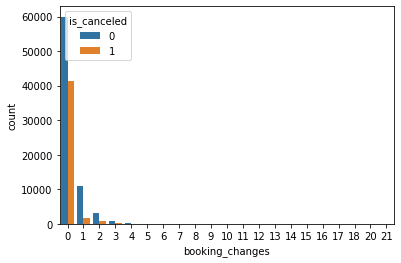

In [5]:
sns.countplot(x="booking_changes",hue="is_canceled",data=data)

In [6]:
#fillna
data['country']=data['country'].fillna(data['country'].mode()[0])
data['agent']=data['agent'].fillna(data['agent'].median())
data['company']=data['company'].fillna(data['company'].median())
data['children']=data['children'].fillna(data['children'].median())
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [7]:
#encoding
data["arrival_date_month"] = le.fit_transform(data["arrival_date_month"])
data["country"] = le.fit_transform(data["country"])
data["market_segment"] = le.fit_transform(data["market_segment"])
data["distribution_channel"] = le.fit_transform(data["distribution_channel"])
data["deposit_type"] = le.fit_transform(data["deposit_type"])
data["customer_type"] = le.fit_transform(data["customer_type"])
data["reservation_status"] = le.fit_transform(data["reservation_status"])
data["reservation_status_date"] = le.fit_transform(data["reservation_status_date"])
data["meal"] = le.fit_transform(data["meal"])
data["reserved_room_type"] = le.fit_transform(data["reserved_room_type"])
data["assigned_room_type"] = le.fit_transform(data["assigned_room_type"])

In [8]:
#Dividing data into Input X variables and Target Y variable
X = data.drop(["hotel","is_canceled"],axis=1)
y = data["is_canceled"]

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [10]:
pred = knn.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_train)

0.9189092170916444

In [11]:
pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.8795544015411676

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'sigmoid', random_state = 0)
svm.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
s_tr_pred = classifier.predict(X_train)
accuracy_score(y_train, s_tr_pred)

In [ ]:
s_te_pred = classifier.predict(X_test)
accuracy_score(y_test, s_te_pred)